# Data visualisation

This notebook visualizes the data from the database provided by [Kaya et al.](https://doi.org/10.1038/sdata.2018.211).
The knowledge and utilities obtained from the experimental notebooks one to three are used throughout this notebook.

Instructions on where to get the data are available on [the GitHub repository of the BCI master thesis project](https://www.github.com/pikawika/bci-master-thesis). These instructions are under `bci-master-thesis/code/data/CLA/README.md`. We will use the utility file `bci-master-thesis/code/utils/CLA_dataset.py` to work with this data, which gathered its functions from the experiments performed in `bci-master-thesis/experimental-notebooks/1-CLA-dataset-exploration-notebook.ipynb` and `bci-master-thesis/experimental-notebooks/2-MNE-datastructure-exploration-notebook.ipynb`. The data was stored as FIF files, which are included in [the GitHub repository of the BCI master thesis project](https://www.github.com/pikawika/bci-master-thesis).

## Table of Contents

- Checking requirements
  - Correct Anaconda environment
  - Correct module access
  - Correct file access
- Loading in data
  - Validating correct annotations and events
- Visualising the data
  - Important markers
  - Raw EEG data
- Cleaning resedual notebook variables

<hr><hr>

## Checking requirements

### Correct Anaconda environment

The `bci-master-thesis` Anaconda environment should be active to ensure proper support. Installation instructions are available on [the GitHub repository of the BCI master thesis project](https://www.github.com/pikawika/bci-master-thesis).

In [10]:
####################################################
# CHECKING FOR RIGHT ANACONDA ENVIRONMENT
####################################################

import os
from platform import python_version
from pathlib import Path
from copy import copy

print(f"Active environment: {os.environ['CONDA_DEFAULT_ENV']}")
print(f"Correct environment: {os.environ['CONDA_DEFAULT_ENV'] == 'bci-master-thesis'}")
print(f"\nPython version: {python_version()}")
print(f"Correct Python version: {python_version() == '3.8.10'}")

Active environment: bci-master-thesis
Correct environment: True

Python version: 3.8.10
Correct Python version: True


<hr>

### Correct module access

The following code block will load in all required modules.

In [11]:
####################################################
# LOADING MODULES
####################################################

# Load util function file
import sys
sys.path.append('../utils')
import CLA_dataset

# Modules tailored for EEG data
import mne; print(f"MNE version (1.0.2 recommended): {mne.__version__}")

# Data manipulation modules
import numpy as np; print(f"Numpy version (1.21.5 recommended): {np.__version__}")

# Plotting
import matplotlib; print(f"Matplotlib version (3.5.1 recommended): {matplotlib.__version__}")
import matplotlib.pyplot as plt

MNE version (1.0.2 recommended): 1.0.2
Numpy version (1.21.5 recommended): 1.21.5
Matplotlib version (3.5.1 recommended): 3.5.1


<hr>

### Correct file access

As mentioned, this notebook uses a database provided by [Kaya et al](https://doi.org/10.1038/sdata.2018.211). The CLA dataset in particular. Instructions on where to get the data are available on [the GitHub repository of the BCI master thesis project](https://www.github.com/pikawika/bci-master-thesis). These instructions are under `bci-master-thesis/code/data/CLA/README.md`. The following code block checks if all required files are available.

In [12]:
####################################################
# CHECKING FILE ACCESS
####################################################

# Use util to determine if we have access
print("Full Matlab CLA file access: " + str(CLA_dataset.check_matlab_files_availability()))
print("Full MNE CLA file access: " + str(CLA_dataset.check_mne_files_availability()))

Full Matlab CLA file access: True
Full MNE CLA file access: True


<hr><hr>

## Loading in data

In this step, we load the data. The data is provided as `.mat` files and thus originally meant for use with MATLAB. 
However, thanks to the written `CLA_dataset` util file we can easily get the MNE raw data from it, FIF files of which are also provided on [the GitHub repository of the BCI master thesis project](https://www.github.com/pikawika/bci-master-thesis).

Please specify the filename in the below code block. For more info on which variants are available, please look at the `bci-master-thesis/code/data/CLA/README.md` file.

Remember the meaning of the markers:
- 0: “blank” or nothing is displayed in eGUI
    - Can be seen as a break between stimuli, thus random EEG data that should probably be ignored
- 1: Left hand action
    - EEG data for MI of the left hand
- 2: Right hand action
    - EEG data for MI of the right hand
- 3: Passive/neutral
    - EEG data for MI of neither left nor right hand but 'focused'
- 91: inter-session rest break period
- 92: experiment end
- 99: initial relaxation period

In [13]:
####################################################
# LOADING RAW MNE DATA
####################################################

# You can specify the data file to use here, per default it is CLASubjectB1512153StLRHand
data_file_name = "CLASubjectB1512153StLRHand"

mne_raw = CLA_dataset.get_raw_mne_data(data_file_name)

print(f"Loaded MNE for {data_file_name}:\n")
display(mne_raw)

Loaded MNE for CLASubjectB1512153StLRHand:



<Raw | CLASubjectB1512153StLRHand_raw.fif, 21 x 667800 (3339.0 s), ~37 kB, data not loaded>

### Validating correct annotations and events

The util file should load in the data correctly.
The following code block will validate this.

In [14]:
####################################################
# VALIDATE ANNOTATIONS AND EVENTS
####################################################

# Validate length
print(f"EEG time in seconds according to MNE: {mne_raw.times.max()} seconds")
print(f"Duration of EEG data manually calculated: {mne_raw.__len__() / mne_raw.info['sfreq']} seconds")

# Validate annotations
important_markers = CLA_dataset.get_important_markers(data_file_name)

print(f"\n\nFirst annotation starts at {mne_raw.annotations[0]['onset']} seconds and ends at {mne_raw.annotations[0]['onset'] + mne_raw.annotations[0]['duration']} seconds with textual marker: {mne_raw.annotations[0]['description']}")
print(f"First important marker starts at {important_markers[0].start_idx / mne_raw.info['sfreq']} seconds and ends at {important_markers[0].end_idx / mne_raw.info['sfreq']} seconds with textual marker: {CLA_dataset.marker_to_textual_dict[important_markers[0].mark]}")


print(f"\nSecond annotation starts at {mne_raw.annotations[1]['onset']} seconds and ends at {mne_raw.annotations[1]['onset'] + mne_raw.annotations[1]['duration']} seconds with textual marker: {mne_raw.annotations[1]['description']}")
print(f"Second important marker starts at {important_markers[1].start_idx / mne_raw.info['sfreq']} seconds and ends at {important_markers[1].end_idx / mne_raw.info['sfreq']} seconds with textual marker: {CLA_dataset.marker_to_textual_dict[important_markers[1].mark]}")


print(f"\nAnnotation 500 starts at {mne_raw.annotations[500]['onset']} seconds and ends at {mne_raw.annotations[500]['onset'] + mne_raw.annotations[500]['duration']} seconds with textual marker: {mne_raw.annotations[500]['description']}")
print(f"Important marker 500 starts at {important_markers[500].start_idx / mne_raw.info['sfreq']} seconds and ends at {important_markers[500].end_idx / mne_raw.info['sfreq']} seconds with textual marker: {CLA_dataset.marker_to_textual_dict[important_markers[500].mark]}")


print(f"\nAnnotation 1000 starts at {mne_raw.annotations[1000]['onset']} seconds and ends at {mne_raw.annotations[1000]['onset'] + mne_raw.annotations[1000]['duration']} seconds with textual marker: {mne_raw.annotations[1000]['description']}")
print(f"Important marker 1000 starts at {important_markers[1000].start_idx / mne_raw.info['sfreq']} seconds and ends at {important_markers[1000].end_idx / mne_raw.info['sfreq']} seconds with textual marker: {CLA_dataset.marker_to_textual_dict[important_markers[1000].mark]}")

# Validate events
mne_events, mne_event_conversion_dict = CLA_dataset.get_events_and_dict_from_annotated_raw(mne_raw)

print(f"\n\nFirst event starts at sample {mne_events[0][0]} with marker {mne_events[0][2]}")
print(f"First important marker starts at sample {important_markers[0].start_idx} with marker {important_markers[0].mark}")

print(f"\nSecond event starts at sample {mne_events[1][0]} with marker {mne_events[1][2]}")
print(f"Second important marker starts at sample {important_markers[1].start_idx} with marker {important_markers[1].mark}")

print(f"\nEvent 500 starts at sample {mne_events[500][0]} with marker {mne_events[500][2]}")
print(f"Important marker 500 starts at sample {important_markers[500].start_idx} with marker {important_markers[500].mark}")

print(f"\nEvent 1000 starts at sample {mne_events[1000][0]} with marker {mne_events[1000][2]}")
print(f"Important marker 1000 starts at sample {important_markers[1000].start_idx} with marker {important_markers[1000].mark}")


# Remove unused variables
del important_markers
del mne_event_conversion_dict
del mne_events


EEG time in seconds according to MNE: 3338.995 seconds
Duration of EEG data manually calculated: 3339.0 seconds


First annotation starts at 0.0 seconds and ends at 180.52499389648438 seconds with textual marker: info/blank_screen
First important marker starts at 0.0 seconds and ends at 180.525 seconds with textual marker: info/blank_screen

Second annotation starts at 180.529999 seconds and ends at 181.53999350683594 seconds with textual marker: task/left
Second important marker starts at 180.53 seconds and ends at 181.54 seconds with textual marker: task/left

Annotation 500 starts at 933.565002 seconds and ends at 935.6049800273438 seconds with textual marker: info/blank_screen
Important marker 500 starts at 933.565 seconds and ends at 935.605 seconds with textual marker: info/blank_screen

Annotation 1000 starts at 1800.52002 seconds and ends at 1802.37500046875 seconds with textual marker: info/blank_screen
Important marker 1000 starts at 1800.52 seconds and ends at 1802.375 secon

<hr><hr>

## Visualising the data

Throughout experimental notebooks one, two and three, multiple visualisations of the data were made.
In what follows we repeat the most important visualisations which are also used or discussed throughout the paper.

<hr>

### Important markers

info/blank_screen


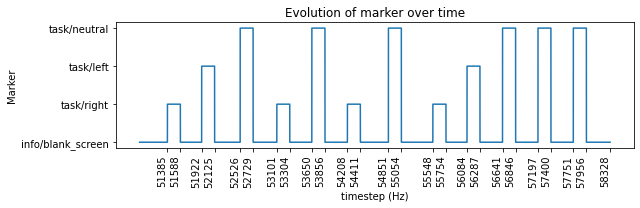

In [15]:
####################################################
# PLOTTING IMPORTANT MARKERS
####################################################

# Get the important markers of a file
important_markers = CLA_dataset.get_important_markers(filename = data_file_name)

print(CLA_dataset.marker_to_textual_dict[important_markers[0].mark])

# Open plot inline
%matplotlib inline

# Data for plotting
subset_important_markers = important_markers[50:75]

# Setup canvas
plt.rcParams["figure.figsize"] = (9,3)

# Plotting code
x = sum([[x.start_idx, x.end_idx] for x in subset_important_markers], [])
y = sum([[CLA_dataset.marker_to_textual_dict[y.mark], CLA_dataset.marker_to_textual_dict[y.mark]] for y in subset_important_markers], [])

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='timestep (Hz)', ylabel='Marker',
       title='Evolution of marker over time')

# Only show every 1 in 2 x points
plt.xticks(x[1::2])
plt.yticks([0, 1, 2, 3])
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

# Save plot
plt.rcParams['savefig.facecolor']='white'
plt.tight_layout()
#plt.savefig('figures/1/markers_evolution.png', dpi=300)

plt.show()
 
# Cleaning up redundant variables from this codeblock
del subset_important_markers
del fig
del ax
del x
del y

# Reset canvas
plt.rcParams.update(plt.rcParamsDefault)

# Delete unused vars
del important_markers

<hr>

### Raw EEG data

In [16]:
####################################################
# BASIC PLOTTING OF MNE DATA PT 2
####################################################

# Plot inline or in popup
%matplotlib inline
# %matplotlib qt 

# Reset canvas
plt.rcParams.update(plt.rcParamsDefault)

# Get important marker
important_markers = CLA_dataset.get_important_markers(filename = data_file_name)

# Determine start of interest in seconds
start = important_markers[50].start_idx / 200

# Default plot function scaled to usable visualisation of 30 seconds of data 
mne_raw.plot(duration=30,
             start=start,
             scalings=dict(eeg=0.00035),
             n_channels=22)

# Save plot
plt.tight_layout()
#plt.savefig('figures/1/eeg.png', dpi=300)

# Show plot
plt.show()

# delete unused vars
del start
del important_markers

Opening raw-browser...


<hr>

### PSD

Effective window size : 10.240 (s)


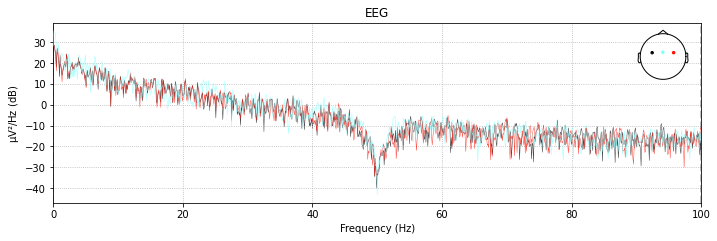

In [ ]:
####################################################
# PSD plot
####################################################

# Plot inline or in popup
%matplotlib inline
# %matplotlib qt 

# Get important markers
important_markers = CLA_dataset.get_important_markers(filename = data_file_name)

# PSD plot for max allowed frequency taking into account nyquist theorem
## Show 300 seconds of data
max_freq = mne_raw.info['sfreq'] / 2
mne_raw.plot_psd(fmax=max_freq, 
                 tmin= (important_markers[50].start_idx/200),
                 tmax=((important_markers[50].start_idx/200) + 30),
                 picks=["C3", "Cz", "C4"]
                 )

# Remove unused variables
del max_freq
del important_markers

<hr><hr>

## Cleaning resedual notebook variables

This last codeblock cleans any resedual notebook variables.

In [9]:
####################################################
# CLEAN NOTEBOOK VARIABLES
####################################################

del data_file_name
del mne_raw
